In [1]:
# importing Libraries
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing datasets
transactions = pd.read_csv('Data/Transactions.csv')
customers = pd.read_csv('Data/Customers.csv')
products = pd.read_csv('Data/Products.csv')

In [3]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [4]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


# Data Preprocessing

In [6]:
# merging datasets
merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

In [7]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [8]:
merged_data.drop(columns=['Price_y'],inplace=True)

In [9]:
merged_data.rename(columns={'Price_x':'Price'},inplace=True)

In [10]:
merged_data = merged_data.iloc[:,[0,1,2,3,11,9,10,7,8,4,6,5]]

In [11]:
merged_data.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
SignupDate         0
CustomerName       0
Region             0
ProductName        0
Category           0
Quantity           0
Price              0
TotalValue         0
dtype: int64

In [12]:
# Converting Object Datatype to Datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])

In [13]:
merged_data.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
SignupDate         datetime64[ns]
CustomerName               object
Region                     object
ProductName                object
Category                   object
Quantity                    int64
Price                     float64
TotalValue                float64
dtype: object

# Business Insights

In [14]:
# Top selling product categoris
top_category = merged_data.groupby('Category')['Quantity'].sum().nlargest(5)
print("Top 5 Categories by Sales:\n ",top_category)

Top 5 Categories by Sales:
  Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


In [15]:
# Top Business regions
top_regions = merged_data.groupby('Region')['TotalValue'].sum().nlargest(3)
print("Top 3 Regions by Sales:\n",top_regions)

Top 3 Regions by Sales:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Name: TotalValue, dtype: float64


In [16]:
# Monthly average sales revanue
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')
avg_transaction_value = merged_data.groupby('YearMonth')['TotalValue'].mean()
print("Average Transaction value over time:\n",avg_transaction_value)

Average Transaction value over time:
 YearMonth
2023-12    942.380000
2024-01    620.340093
2024-02    668.302208
2024-03    597.859125
2024-04    668.826279
2024-05    750.322558
2024-06    706.828696
2024-07    743.399896
2024-08    674.858936
2024-09    735.455729
2024-10    672.331714
2024-11    670.602982
2024-12    757.041026
Freq: M, Name: TotalValue, dtype: float64


In [17]:
# Customer Signup Per month
customer_signup_trends = merged_data['SignupDate'].dt.to_period('M').value_counts().sort_index()
print("Customer Signup Trends:\n",customer_signup_trends.head())

Customer Signup Trends:
 SignupDate
2022-01     6
2022-02    34
2022-03    46
2022-04    42
2022-05    57
Freq: M, Name: count, dtype: int64


In [18]:
# Top products with highest revenue
product_performance = merged_data.groupby('ProductName').agg(
    total_revenue = ('TotalValue','sum'),
    total_quantity = ('Quantity','sum'),
    avg_price = ('Price','mean')
).sort_values(by='total_revenue',ascending=False)
print("Top products by Revenue:\n",product_performance.head())

Top products by Revenue:
                        total_revenue  total_quantity   avg_price
ProductName                                                     
ActiveWear Smartwatch       39096.97             100  399.431750
SoundWave Headphones        25211.64              97  263.834474
SoundWave Novel             24507.90              58  420.735000
ActiveWear Jacket           22712.56              76  303.696923
ActiveWear Rug              22314.43              79  284.657931


# Visualization of Average transaction per month

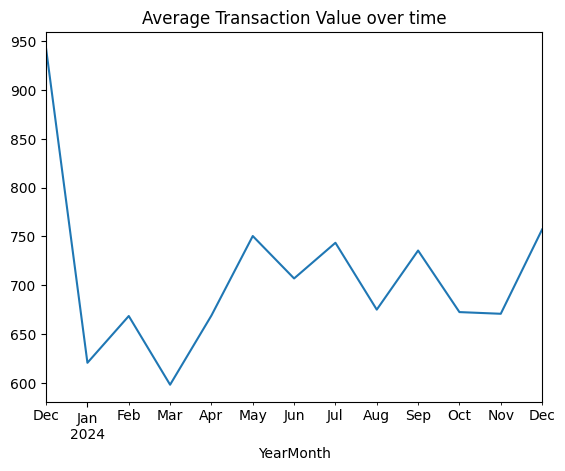

In [19]:
avg_transaction_value.plot(kind='line',title='Average Transaction Value over time')
plt.show()